In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap
from my_functions import *
import re

In [2]:
data2 = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data2 = clean_data(data2)
# contar por municipio cuando barrio es sin informacion
total = data2[data2["BARRIO"] == "sin información"].groupby("MUNICIPIO").size()
print(total)


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


MUNICIPIO
barbosa       104
bello        4422
caldas        173
envigado        5
itagui      17464
medellín      142
sabaneta     5248
dtype: int64


In [3]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data = clean_data(data)
#se eliminan los barrios sin información, ya que "BARRIO" es un parametro para el modelo
data = delete_barrios_sin_info(data)
data["HORA24"] = data["HORA"].apply(convertir_hora)
data


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO,HORA24
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via,13
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via,15
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via,4
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via,12
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via,13
...,...,...,...,...,...,...,...,...,...,...,...,...
194555,1.0,medellín,22/05/2015,7:35:00,viernes,atropello,cl 65 cr 77 49,muertos,san germán,robledo,sin información,7
194556,1.0,medellín,22/05/2015,14:30:00,viernes,atropello,cl 48 cr 4 131,muertos,barrio de jesús,buenos aires,sin información,14
194557,1.0,medellín,22/05/2015,20:15:00,viernes,atropello,cr 55 cl 64,muertos,jesús nazareno,la candelaria,sin información,20
194558,1.0,medellín,25/05/2015,0:58:00,lunes,atropello,cl 44 cr 60 40,muertos,corazón de jesús,la candelaria,sin información,0


In [4]:
# Algunas fechas vienen tipo DD/MM/YYYY y otras tipo MM/DD/YYYY
dia = data["FECHA"].apply(lambda x: int(re.findall(r"^\d{1,2}", x)[0]) if re.findall(r"^\d{1,2}", x) else 0)
mes = data["FECHA"].apply(lambda x: int(re.findall(r"/(\d{1,2})/", x)[0]) if re.findall(r"/(\d{1,2})/", x) else 0)
data["MES"] = np.where(mes < 13, mes, dia)
data["MES"] = data["MES"].apply(convertir_mes)
data

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO,HORA24,MES
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via,13,enero
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via,15,enero
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via,4,enero
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via,12,enero
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via,13,enero
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194555,1.0,medellín,22/05/2015,7:35:00,viernes,atropello,cl 65 cr 77 49,muertos,san germán,robledo,sin información,7,mayo
194556,1.0,medellín,22/05/2015,14:30:00,viernes,atropello,cl 48 cr 4 131,muertos,barrio de jesús,buenos aires,sin información,14,mayo
194557,1.0,medellín,22/05/2015,20:15:00,viernes,atropello,cr 55 cl 64,muertos,jesús nazareno,la candelaria,sin información,20,mayo
194558,1.0,medellín,25/05/2015,0:58:00,lunes,atropello,cl 44 cr 60 40,muertos,corazón de jesús,la candelaria,sin información,0,mayo


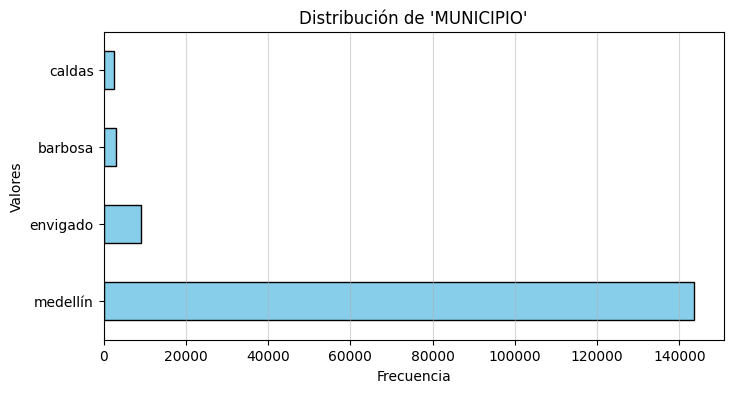

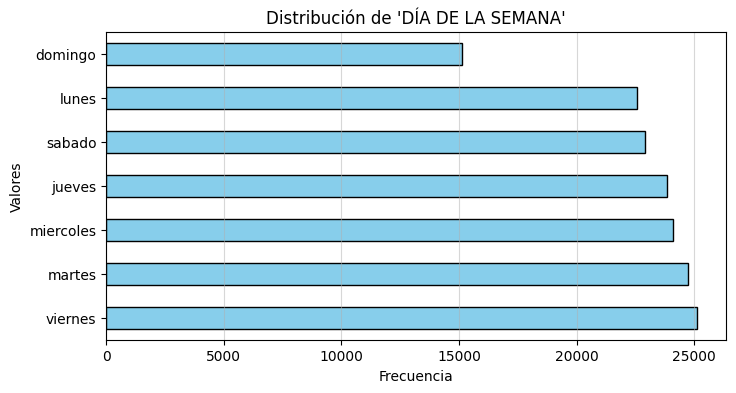

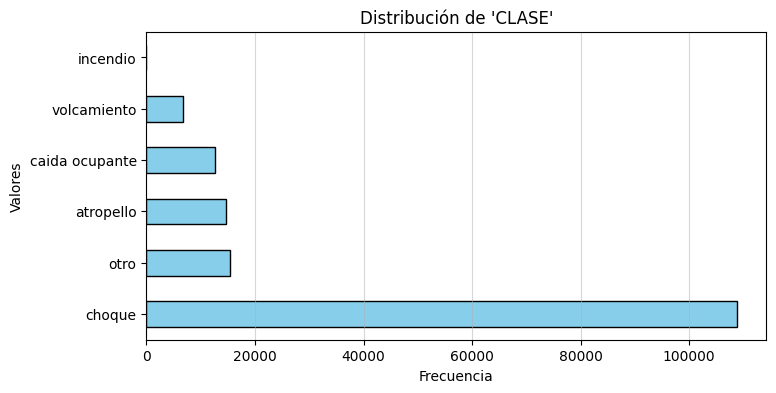

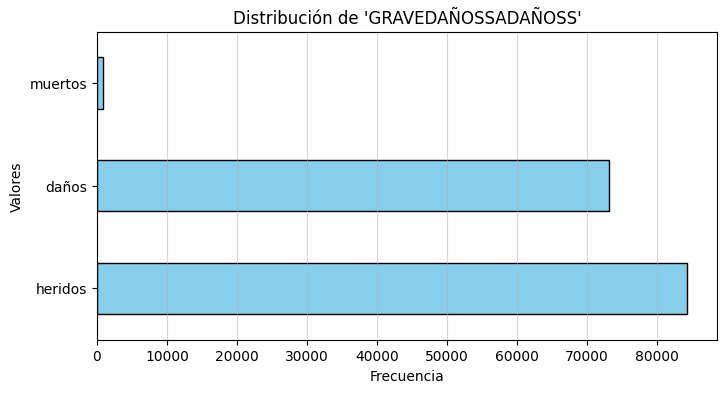

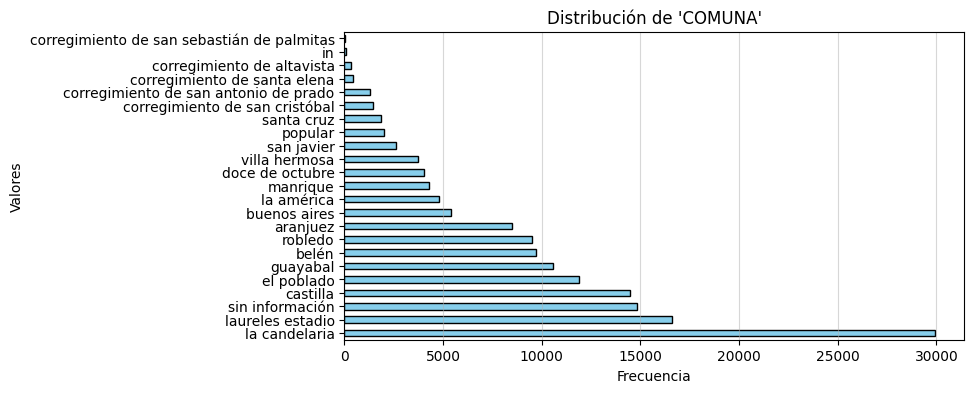

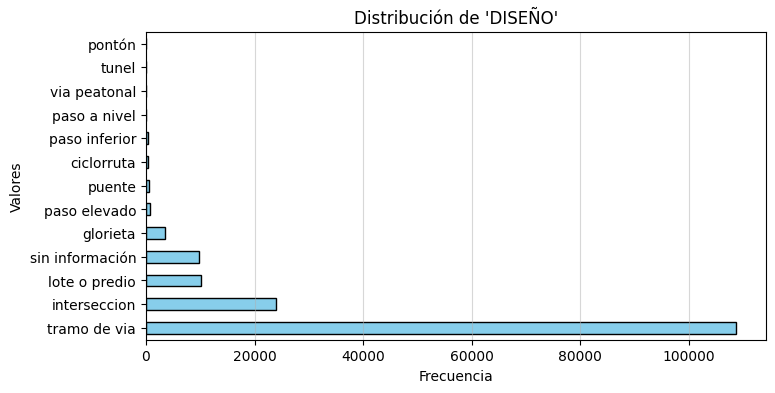

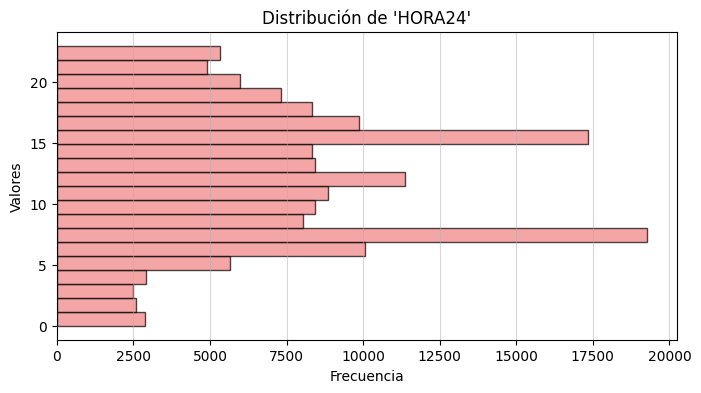

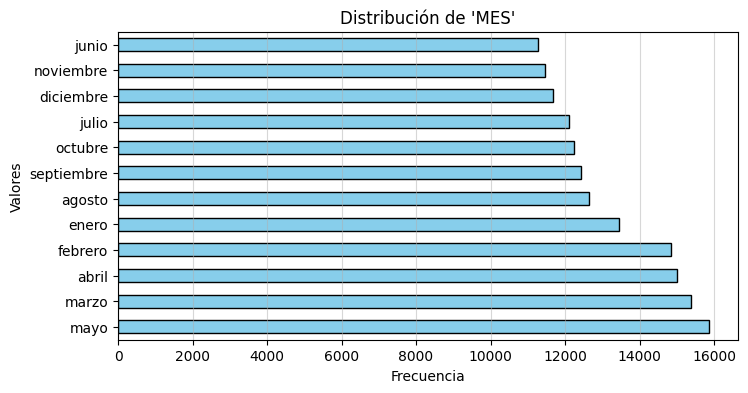

In [5]:
graficar_histogramas(data)

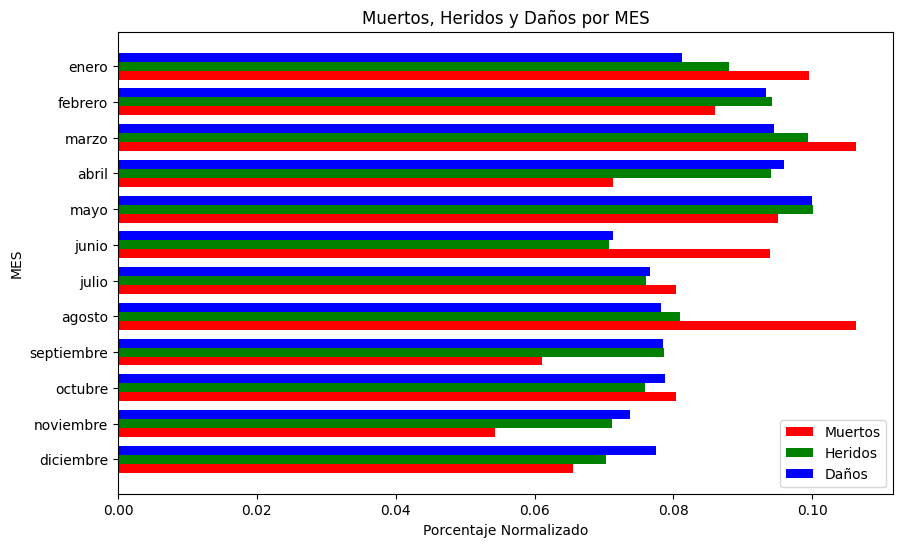

In [6]:
meses_ordenados = ["diciembre", "noviembre", "octubre", "septiembre", "agosto", "julio", "junio", "mayo", "abril", "marzo", "febrero", "enero"]

muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("MES").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("MES").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("MES").size()
muertos = muertos[meses_ordenados]
heridos = heridos[meses_ordenados]
daños = daños[meses_ordenados]
muertos_heridos_daños(muertos, heridos, daños, "MES")

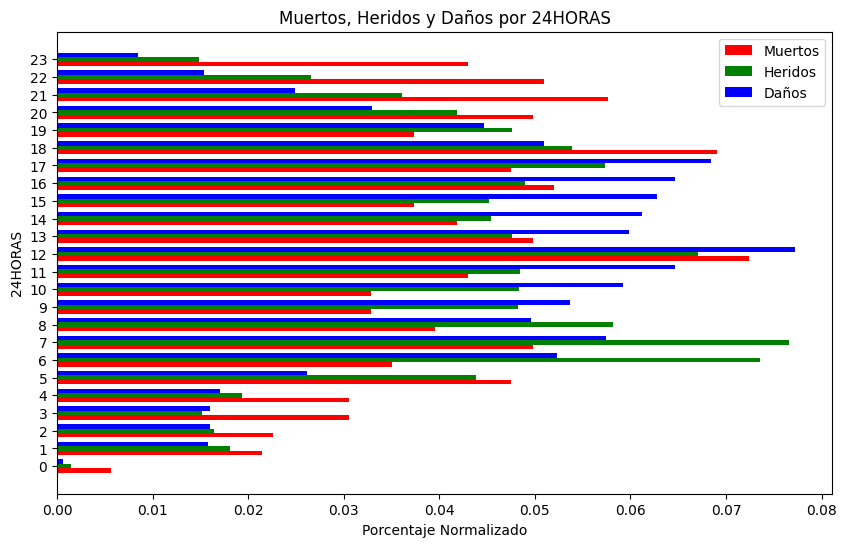

In [7]:
muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("HORA24").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("HORA24").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("HORA24").size()

muertos_heridos_daños(muertos, heridos, daños, "24HORAS")

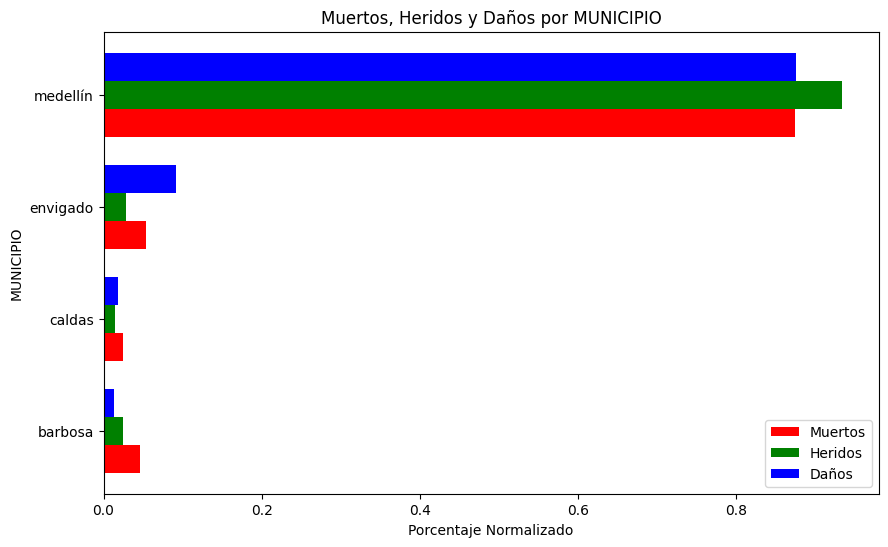

In [8]:
muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("MUNICIPIO").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("MUNICIPIO").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("MUNICIPIO").size()

muertos_heridos_daños(muertos, heridos, daños, "MUNICIPIO")

In [10]:
data[data["MUNICIPIO"]=="medellín"].to_csv("../files/input/data.csv", index=False)